In [1]:
# Paul-Jason Mello
# Prof Shim
# March 17th, 2022
# Lab 1

In [2]:
#Kaggle Competition Website: https://www.kaggle.com/c/cmpe-257-lab-1-spring-2022/overview

# Kaggle Competition

In [3]:
# Data Description: 
# The dataset contains information about people’s jobs such as their demographic information etc. 
# and the target variable is to predict whether the person is looking for a job change or not, the 
# dataset is imbalanced. There are 14,368 rows in the training set and 4790 rows in the testing set. 

In [4]:
# The columns in the dataset are as follows:
# index:                    Unique ID for candidate
# city:                     City code
# city development index:   Development index of the city (scaled)
# gender:                   Gender of candidate
# relevent experience:      Relevant experience of candidate
# enrolled university:      Type of University course enrolled if any
# education level:          Education level of candidate
# major discipline:         Education major discipline of candidate
# experience:               Candidate total experience in years
# company_size:             No of employees in current employer's company
# company_type:             Type of current employer
# last_new_job:             Difference in years between previous job and current job
# training_hours:           training hours completed
# target:                   0 – Not looking for job change     1 – Looking for a job change

In [5]:
import numpy as np
import seaborn as sns
import matplotlib as plt
import pandas as pd
import sklearn as sk
import random
import scipy.stats as stats # Pearson Correlation
import matplotlib.pyplot as pyplt
import statsmodels.api as sm

# Various Libraries Needed
from imblearn.over_sampling import SMOTE
from scipy.special import expit

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

sns.set(rc={"figure.figsize":(15, 15)})

In [6]:
X_test = pd.read_csv("x_test.csv")
X_train = pd.read_csv("x_train.csv")
Y_train = pd.read_csv("y_train.csv")

In [7]:
x_target = pd.merge(X_train, Y_train, on = "index", how = "inner")
x_target

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,17007,city_61,0.913,Male,Has relevent experience,no_enrollment,Masters,STEM,4,100-500,NGO,1,22,0.0
1,631,city_94,0.698,Male,Has relevent experience,NaN,High School,NaN,3,NaN,NaN,1,22,1.0
2,669,city_114,0.926,NaN,Has relevent experience,Full time course,Masters,STEM,9,50-99,Pvt Ltd,1,88,0.0
3,8949,city_114,0.926,Male,No relevent experience,Full time course,Graduate,STEM,14,NaN,NaN,4,91,0.0
4,2341,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,1,5000-9999,Pvt Ltd,1,92,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14363,16304,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,>4,157,0.0
14364,79,city_103,0.920,Female,Has relevent experience,no_enrollment,Masters,STEM,2,<10,Early Stage Startup,1,4,0.0
14365,12119,city_21,0.624,Male,Has relevent experience,no_enrollment,Masters,STEM,1,50-99,Pvt Ltd,NaN,34,0.0
14366,14147,city_10,0.895,Male,Has relevent experience,no_enrollment,Masters,STEM,15,100-500,Public Sector,1,4,0.0


# 6. Handle missing values: Use any three methods to handle missing values. 
(6 points)

In [8]:
X_test.isnull().sum()

index                        0
city                         0
city_development_index       0
gender                    1115
relevent_experience          0
enrolled_university         94
education_level            122
major_discipline           724
experience                  20
company_size              1508
company_type              1542
last_new_job                96
training_hours               0
dtype: int64

In [9]:
xPreprocessed = x_target.copy()
xDropped = x_target.copy()

In [10]:
xDropped = xDropped.dropna()

In [11]:
# We find many missing values from company size so why not remove it as a whole?

# xDropped = xDropped.drop('company_size',axis = 1)

In [12]:
# xDropped contains all rows without any missing values
xDropped

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,17007,city_61,0.913,Male,Has relevent experience,no_enrollment,Masters,STEM,4,100-500,NGO,1,22,0.0
6,5241,city_11,0.550,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,50-99,Pvt Ltd,1,7,1.0
7,2523,city_160,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,2,276,0.0
8,2705,city_23,0.899,Male,Has relevent experience,Full time course,Graduate,STEM,12,10000+,Pvt Ltd,2,69,0.0
11,12441,city_75,0.939,Male,Has relevent experience,Part time course,Graduate,STEM,13,500-999,Pvt Ltd,1,22,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14359,13890,city_102,0.804,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,100-500,Pvt Ltd,4,82,0.0
14361,14260,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Pvt Ltd,>4,132,0.0
14364,79,city_103,0.920,Female,Has relevent experience,no_enrollment,Masters,STEM,2,<10,Early Stage Startup,1,4,0.0
14366,14147,city_10,0.895,Male,Has relevent experience,no_enrollment,Masters,STEM,15,100-500,Public Sector,1,4,0.0


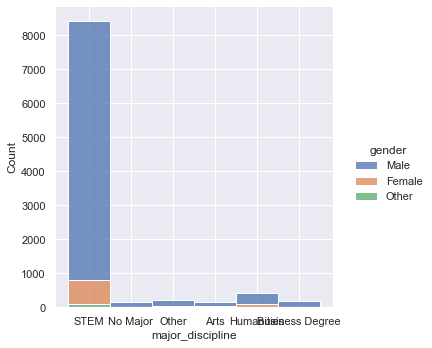

In [13]:
# The following plots should help demonstrate that the following actions taken to address missing data. It 
# should not greatly bias the dataset as a whole.

sns.displot(xPreprocessed, x = 'major_discipline', hue = 'gender', multiple = "stack")

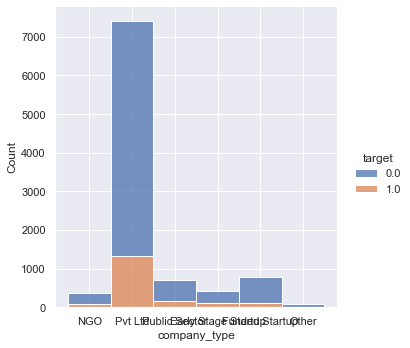

In [14]:
sns.displot(xPreprocessed, x = 'company_type', hue = 'target', multiple = "stack")

In [15]:
# Since the data is very imbalanced it should be safe to fill missing values with Male as the majority 
# of respondents are male.
    
xPreprocessed['gender'] = xPreprocessed['gender'].fillna('Male')
X_test['gender'] = X_test['gender'].fillna('Male')
xPreprocessed.isnull().sum()

index                        0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        292
education_level            338
major_discipline          2089
experience                  45
company_size              4430
company_type              4598
last_new_job               327
training_hours               0
target                       0
dtype: int64

In [16]:
xPreprocessed['major_discipline'] = xPreprocessed['major_discipline'].fillna('STEM') # Most are STEM
X_test['major_discipline'] = X_test['major_discipline'].fillna('STEM')
xPreprocessed.isnull().sum()

index                        0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        292
education_level            338
major_discipline             0
experience                  45
company_size              4430
company_type              4598
last_new_job               327
training_hours               0
target                       0
dtype: int64

In [17]:
xPreprocessed['company_type'] = xPreprocessed['company_type'].fillna('Pvt Ltd') # Most are Pvt Ltd
xPreprocessed['major_discipline'] = xPreprocessed['major_discipline'].fillna('STEM')
X_test['company_type'] = X_test['company_type'].fillna('Pvt Ltd') # Most are Pvt Ltd
X_test['major_discipline'] = X_test['major_discipline'].fillna('STEM')
xPreprocessed.isnull().sum()

index                        0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        292
education_level            338
major_discipline             0
experience                  45
company_size              4430
company_type                 0
last_new_job               327
training_hours               0
target                       0
dtype: int64

In [18]:
xPreprocessed = xPreprocessed.replace('', np.nan)
X_test = X_test.replace('', np.nan)

xPreprocessed = xPreprocessed.drop("company_size", axis = 1)
X_test = X_test.drop('company_size', axis = 1)

xPreprocessed = xPreprocessed.dropna(axis = 0)

xPreprocessed.isnull().sum()

index                     0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [19]:
X_test.isnull().sum()

index                       0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university        94
education_level           122
major_discipline            0
experience                 20
company_type                0
last_new_job               96
training_hours              0
dtype: int64

In [20]:
cols = ["last_new_job", "experience", "education_level", "enrolled_university"]

X_test = X_test.fillna(X_test.mode().iloc[0])

In [21]:
X_test.isnull().sum()

index                     0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [22]:
#index 	city_development_index 	enrolled_university 	education_level

In [23]:
print("Original Shape: " + str(x_target.shape))
print("Preprocessed Shape: " + str(xPreprocessed.shape))
print("Dropped Shape: " + str(xDropped.shape))
print("X_test Shape: " + str(X_test.shape))

Original Shape: (14368, 14)
Preprocessed Shape: (13511, 13)
Dropped Shape: (6705, 14)
X_test Shape: (4790, 12)


# 8. Scale the features for models that require scaling and perform required pre-processing
(such as one hot encoding etc.) 
(5 points)

In [24]:
xPreprocessed

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,17007,city_61,0.913,Male,Has relevent experience,no_enrollment,Masters,STEM,4,NGO,1,22,0.0
2,669,city_114,0.926,Male,Has relevent experience,Full time course,Masters,STEM,9,Pvt Ltd,1,88,0.0
3,8949,city_114,0.926,Male,No relevent experience,Full time course,Graduate,STEM,14,Pvt Ltd,4,91,0.0
4,2341,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,1,Pvt Ltd,1,92,0.0
5,10586,city_98,0.949,Male,Has relevent experience,no_enrollment,Graduate,STEM,17,Pvt Ltd,1,18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14362,16734,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,<1,Pvt Ltd,never,20,1.0
14363,16304,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Pvt Ltd,>4,157,0.0
14364,79,city_103,0.920,Female,Has relevent experience,no_enrollment,Masters,STEM,2,Early Stage Startup,1,4,0.0
14366,14147,city_10,0.895,Male,Has relevent experience,no_enrollment,Masters,STEM,15,Public Sector,1,4,0.0


In [25]:
scaled = StandardScaler()

cols = ['city_development_index', 'training_hours']
X_test[cols] = scaled.fit_transform(X_test[cols])
xPreprocessed[cols] = scaled.fit_transform(xPreprocessed[cols])

In [26]:
encode = LabelEncoder()

cols = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline',
        'experience', 'company_type', 'last_new_job']
        #'company_size'
    
X_test['city'] = encode.fit_transform(X_test['city'])
X_test['gender'] = encode.fit_transform(X_test['gender'])
X_test['relevent_experience'] = encode.fit_transform(X_test['relevent_experience'])
X_test['enrolled_university'] = encode.fit_transform(X_test['enrolled_university'])
X_test['education_level'] = encode.fit_transform(X_test['education_level'])
X_test['major_discipline'] = encode.fit_transform(X_test['major_discipline'])
X_test['experience'] = encode.fit_transform(X_test['experience'])
#X_test['company_size'] = encode.fit_transform(X_test['company_size'])
X_test['company_type'] = encode.fit_transform(X_test['company_type'])
X_test['last_new_job'] = encode.fit_transform(X_test['last_new_job'])

xPreprocessed['city'] = encode.fit_transform(xPreprocessed['city'])
xPreprocessed['gender'] = encode.fit_transform(xPreprocessed['gender'])
xPreprocessed['relevent_experience'] = encode.fit_transform(xPreprocessed['relevent_experience'])
xPreprocessed['enrolled_university'] = encode.fit_transform(xPreprocessed['enrolled_university'])
xPreprocessed['education_level'] = encode.fit_transform(xPreprocessed['education_level'])
xPreprocessed['major_discipline'] = encode.fit_transform(xPreprocessed['major_discipline'])
xPreprocessed['experience'] = encode.fit_transform(xPreprocessed['experience'])
#xPreprocessed['company_size'] = encode.fit_transform(xPreprocessed['company_size'])
xPreprocessed['company_type'] = encode.fit_transform(xPreprocessed['company_type'])
xPreprocessed['last_new_job'] = encode.fit_transform(xPreprocessed['last_new_job'])

In [27]:
#scale = MinMaxScaler()

#xPreprocessed[['city_development_index', 'training_hours']] = scale.fit_transform(xPreprocessed[['city_development_index', 'training_hours']])

In [28]:
xPreprocessed

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,17007,91,0.670815,1,0,2,2,5,14,2,0,-0.718816,0.0
2,669,13,0.777126,1,0,0,2,5,19,5,0,0.374650,0.0
3,8949,13,0.777126,1,1,0,0,5,5,5,3,0.424353,0.0
4,2341,48,0.646281,1,0,2,0,5,0,5,0,0.440921,0.0
5,10586,121,0.965215,1,0,2,0,5,8,5,0,-0.785086,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14362,16734,64,-1.692568,1,1,0,0,5,20,5,5,-0.751951,1.0
14363,16304,5,0.728059,1,0,2,0,5,21,5,4,1.517820,0.0
14364,79,5,0.728059,0,0,2,2,5,11,0,0,-1.017034,0.0
14366,14147,1,0.523614,1,0,2,2,5,6,4,0,-1.017034,0.0


In [29]:
newPre = xPreprocessed.copy()

newPre = newPre.drop("gender", axis = 1)
newPre = newPre.drop("city", axis = 1)
newPre = newPre.drop("relevent_experience", axis = 1)
newPre = newPre.drop("major_discipline", axis = 1)
newPre = newPre.drop("experience", axis = 1)
newPre = newPre.drop("company_type", axis = 1)
newPre = newPre.drop("training_hours", axis = 1)
newPre = newPre.drop("last_new_job", axis = 1)

X_test = X_test.drop("gender", axis = 1)
X_test = X_test.drop("city", axis = 1)
X_test = X_test.drop("relevent_experience", axis = 1)
X_test = X_test.drop("major_discipline", axis = 1)
X_test = X_test.drop("experience", axis = 1)
X_test = X_test.drop("company_type", axis = 1)
X_test = X_test.drop("training_hours", axis = 1)
X_test = X_test.drop("last_new_job", axis = 1)

In [30]:
newPre

,index,city_development_index,enrolled_university,education_level,target
0,17007,0.670815,2,2,0.0
2,669,0.777126,0,2,0.0
3,8949,0.777126,0,0,0.0
4,2341,0.646281,2,0,0.0
5,10586,0.965215,2,0,0.0
...,...,...,...,...,...
14362,16734,-1.692568,0,0,1.0
14363,16304,0.728059,2,0,0.0
14364,79,0.728059,2,2,0.0
14366,14147,0.523614,2,2,0.0


In [31]:
X_test

,index,city_development_index,enrolled_university,education_level
0,16834,0.758006,2,4
1,15437,0.774244,2,2
2,8549,0.749888,0,1
3,7222,0.725531,2,4
4,17054,0.725531,2,0
...,...,...,...,...
4785,5915,-1.677618,0,0
4786,11083,0.725531,2,0
4787,2335,0.725531,2,0
4788,7691,-1.677618,0,2


In [32]:
# Dropping all non-continuous data

def dataBuildContinuous(Data):
    independent = Data.copy()
    independent.drop(independent.columns.difference(['index','target']), 1, inplace=True)
    dependent = Data.drop('target', axis = 1)
#    dependent = dependent.drop(['city', 'gender', 'relevent_experience', 'enrolled_university', 
#                                'last_new_job', 'major_discipline', 'experience', 'company_size', 
#                                'company_type', 'education_level'], axis = 1)
    return independent, dependent

In [33]:
# Dropping all continuous data

def dataBuildDiscrete(Data):
    independent = Data.drop('city', axis = 1) # Fix this if I use it
    dependent = Data.drop('target', axis = 1)
#    dependent = dependent.drop(['city_development_index', 'training_hours'], axis = 1)
    return independent, dependent

In [34]:
# Building continuous dataset to split

# independent, dependent = dataBuildContinuous(xDropped)

In [35]:
# Building continuous dataset to split

independent, dependent = dataBuildContinuous(newPre)

C:\Users\GIGA\AppData\Local\Temp/ipykernel_7856/2478593352.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  independent.drop(independent.columns.difference(['index','target']), 1, inplace=True)


In [36]:
# Building discrete dataset to split

# DiscIndependent, DiscDependent = dataBuildDiscrete(xDropped)

In [37]:
# Building discrete dataset to split

#DiscIndependent, DiscDependent = dataBuildDiscrete(newPre)

In [38]:
independent

,index,target
0,17007,0.0
2,669,0.0
3,8949,0.0
4,2341,0.0
5,10586,0.0
...,...,...
14362,16734,1.0
14363,16304,0.0
14364,79,0.0
14366,14147,0.0


In [39]:
independent.drop("index", axis = 1)

,target
0,0.0
2,0.0
3,0.0
4,0.0
5,0.0
...,...
14362,1.0
14363,0.0
14364,0.0
14366,0.0


In [40]:
dependent

,index,city_development_index,enrolled_university,education_level
0,17007,0.670815,2,2
2,669,0.777126,0,2
3,8949,0.777126,0,0
4,2341,0.646281,2,0
5,10586,0.965215,2,0
...,...,...,...,...
14362,16734,-1.692568,0,0
14363,16304,0.728059,2,0
14364,79,0.728059,2,2
14366,14147,0.523614,2,2


In [41]:
# Resplitting the Data into training and test sets.

XX_train, XX_test, yy_train, yy_test = train_test_split(dependent, independent, 
                                                        test_size = 0.3, random_state = 0)

#x_val, x_ttest, y_val, y_ttest = train_test_split(XX_test, yy_test, test_size = 0.3, random_state = 0)
#
# XXD_train, XXD_test, yyD_train, yyD_test = train_test_split(DiscDependent, DiscIndependent, 
#                                                        test_size = 0.25, random_state = 0)


In [42]:
print("X_train dimensions: " + str(X_train.shape))
print("X_test dimensions: " + str(X_test.shape))
print("y_train dimensions: " + str(Y_train.shape))
#print("Validation Set dimensions: " + str(validationSet.shape))

X_train dimensions: (14368, 13)
X_test dimensions: (4790, 4)
y_train dimensions: (14368, 2)


In [43]:
XX_train

,index,city_development_index,enrolled_university,education_level
13656,12340,0.728059,2,1
4272,12371,-1.692568,2,0
7894,2764,0.728059,2,0
8608,8623,0.646281,2,1
14310,5305,0.728059,2,2
...,...,...,...,...
13949,4389,-0.220565,2,0
3451,16647,0.687170,2,0
10457,10809,-0.236921,0,0
11495,4354,0.728059,2,0


In [44]:
yy_train

,index,target
13656,12340,0.0
4272,12371,1.0
7894,2764,0.0
8608,8623,0.0
14310,5305,0.0
...,...,...
13949,4389,1.0
3451,16647,0.0
10457,10809,1.0
11495,4354,0.0


In [45]:
XX_test

,index,city_development_index,enrolled_university,education_level
683,18807,0.777126,2,3
5336,15040,0.589037,2,0
7273,12186,-0.850255,2,0
8228,13012,0.646281,2,2
6045,14628,0.384592,2,2
...,...,...,...,...
9364,15449,-0.236921,2,0
12379,7961,0.073836,2,0
6492,1501,0.728059,2,0
2673,302,-0.220565,0,0


In [46]:
yy_test

,index,target
683,18807,1.0
5336,15040,0.0
7273,12186,0.0
8228,13012,0.0
6045,14628,0.0
...,...,...
9364,15449,0.0
12379,7961,1.0
6492,1501,0.0
2673,302,0.0


# 17. Write any one classification algorithm without using scikit-learn and train on the final data. 
(10 points)

In [47]:
class MyLRModel:
    def __init__(self, X, Y):
        self.data = X
        self.length = len(X)
        self.target = Y
        self.intercept = 0
        self.slope = 0
        self.y_pred = 0
    
    def deriveThis(self, length, data, target, y_pred):
        slope = sum(self.data * (self.target - self.y_pred)) * (-2/self.length)
        intercept = sum((self.target - self.y_pred)) * (-1/self.length)
        return slope, intercept
    
    def fitLR(self, epochNum, rate):
        for i in range(epochNum):
            self.y_pred = self.slope * self.data + self.intercept
            derivedSlope, derivedIntercept = self.deriveThis(self.length, self.data, self.target, self.y_pred)
            self.slope = self.slope - rate * derivedSlope
            self.intercept = self.intercept - rate * derivedIntercept
            
    def getModel(self):
        return self.slope, self.intercept
            
    def prediction(self, X):
        return self.intercept + self.slope * X

In [48]:
class MyLRModel2:
    def __init__(self):
        self.rate = .1
        self.num = 100
        self.bias = None
        self.weights = None
    
    def fit(self, X, Y):
        NNumber, NFeat = X.shape
        self.weights = np.zeros(NFeat)
        self.bias = 0
        self.X = X
        self.Y = Y
        
        for i in range(self.num):
            ypred = self.prediction(self.X)
            derivedW = - ( 2 * (self.X.T ).dot(self.Y - ypred)) / NNumber
            derivedb = - 2 * np.sum( self.Y - ypred ) / NNumber
            self.weights = self.weights - self.rate * derivedW
            self.bias = self.bias - self.rate * derivedb
            
    def prediction(self, X):
        return np.dot(X, self.weights) + self.bias

In [49]:
#XX_train, XX_test, yy_train, yy_test
#temp_train = X_test.copy()
#temp_train = temp_train.drop("index", axis = 1)

tempX_train = XX_train.copy()
tempX_train = tempX_train.drop("index", axis = 1)

tempY_train = yy_train.copy()
tempY_train = tempY_train.drop("index", axis = 1)

In [50]:
tempX_train

,city_development_index,enrolled_university,education_level
13656,0.728059,2,1
4272,-1.692568,2,0
7894,0.728059,2,0
8608,0.646281,2,1
14310,0.728059,2,2
...,...,...,...
13949,-0.220565,2,0
3451,0.687170,2,0
10457,-0.236921,0,0
11495,0.728059,2,0


In [51]:
indexHolder = X_test.copy()
indexHolder = indexHolder.drop("city_development_index", axis = 1)
indexHolder = indexHolder.drop("enrolled_university", axis = 1)
indexHolder = indexHolder.drop("education_level", axis = 1)

X_test = X_test.drop("index", axis = 1)

In [52]:
indexHolder

,index
0,16834
1,15437
2,8549
3,7222
4,17054
...,...
4785,5915
4786,11083
4787,2335
4788,7691


In [53]:
X_test

,city_development_index,enrolled_university,education_level
0,0.758006,2,4
1,0.774244,2,2
2,0.749888,0,1
3,0.725531,2,4
4,0.725531,2,0
...,...,...,...
4785,-1.677618,0,0
4786,0.725531,2,0
4787,0.725531,2,0
4788,-1.677618,0,2


In [54]:
tempY_train

,target
13656,0.0
4272,1.0
7894,0.0
8608,0.0
14310,0.0
...,...
13949,1.0
3451,0.0
10457,1.0
11495,0.0


In [55]:
modelLRR = MyLRModel2()
modelLRR.fit(tempX_train, tempY_train["target"])
pred = modelLRR.prediction(X_test)

In [56]:
pred

array([0.05814709, 0.09339387, 0.18803593, ..., 0.13776023, 0.51011744,
       0.16942988])

In [57]:
XXXData = X_test

In [58]:
XXXData['target'] = pred
XXXData['city_development_index'] = indexHolder["index"]

In [59]:
XXXData.rename(columns = {'city_development_index':'index'}, inplace = True)
XXXData = XXXData.drop("enrolled_university", axis = 1)
XXXData = XXXData.drop("education_level", axis = 1)

In [60]:
XXXData.to_csv('submissionALTMODEL.csv')

In [61]:
y = newPre['target']
x = newPre[['city_development_index', 'enrolled_university', 'education_level']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     664.5
Date:                Sun, 20 Mar 2022   Prob (F-statistic):               0.00
Time:                        00:34:13   Log-Likelihood:                -6827.1
No. Observations:               13511   AIC:                         1.366e+04
Df Residuals:                   13507   BIC:                         1.369e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

C:\Users\GIGA\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [62]:
curXT = np.array(XX_test.iloc[:,1])
curYT = np.array(yy_test.iloc[:,1])
curX = np.array(XX_train.iloc[:,1])
curY = np.array(yy_train.iloc[:,1])

print(curX)
print(curY)

[ 0.7280593  -1.69256833  0.7280593  ... -0.23692064  0.7280593
  0.7280593 ]
[0. 1. 0. ... 1. 0. 0.]


In [63]:
len(curY)

9457

In [64]:
def rmseD(curY, curX, rmse, slop, inter):
    for i in range(len(curY)):
        modelPrediction =  inter + slop * curX[i]
        rmse += (curY[i] - modelPrediction) ** 2
        rmse = np.sqrt(rmse/len(curY))
    return rmse

In [65]:
#epochRMSE = []
#rmse = 0

lr = MyLRModel(curX, curY)
slop, inter = lr.getModel()
lr.fitLR(199, .01)

#for i in range(200):

    #rmseA = rmseD(curY, curX, rmse, slop, inter)
    #epochRMSE.append(rmseA)

#print(str(np.min(epochRMSE)) + " " + str(epochRMSE.index(np.max(epochRMSE))))
model_pred = lr.prediction(curXT)
model_pred

array([0.09950898, 0.1265327 , 0.33332292, ..., 0.10655865, 0.2428522 ,
       0.10303381])

In [66]:
#0.0014503304785782728 114
#0.0014503304717616403 199
#0.00010580087868034131 199

<function matplotlib.pyplot.show(close=None, block=None)>

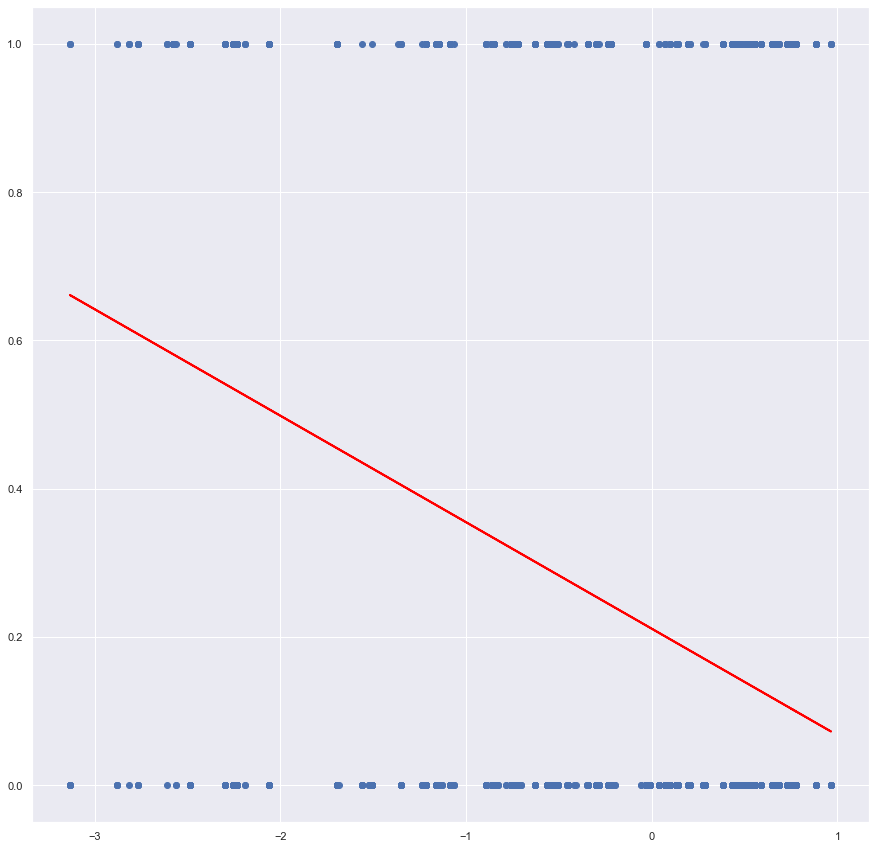

In [67]:
pyplt.scatter(curX, curY)
pyplt.plot(curXT, model_pred , color = 'red', lw = 2)
pyplt.show

In [68]:
finalData = yy_test

In [69]:
finalData

,index,target
683,18807,1.0
5336,15040,0.0
7273,12186,0.0
8228,13012,0.0
6045,14628,0.0
...,...,...
9364,15449,0.0
12379,7961,1.0
6492,1501,0.0
2673,302,0.0


In [70]:
finalData['target'] = model_pred

In [71]:
finalData

,index,target
683,18807,0.099509
5336,15040,0.126533
7273,12186,0.333323
8228,13012,0.118308
6045,14628,0.155906
...,...,...
9364,15449,0.245202
12379,7961,0.200554
6492,1501,0.106559
2673,302,0.242852


In [72]:
finalData.to_csv('ALTMODEL1.csv')

# 18. Submit the test predictions using your model from question 14 to the Kaggle competition.

(Note: Actual ranking would be based on a private leader board data (40% of the test
data), the live ranking is given only using the public leader board data (60% of the test
data)) (9 points)

# 19. Create a detailed report of the lab. 
(10 points)

# 20. Give your comments on how you found the lab tasks.
(0 points)

In [73]:
# At times this lab seemed pretty restrictive which made it more difficult. The directions were clear, but the
# goal of the lab felt watered down into a sea of checklists. Had I known how the lab would evolve as I worked
# on it I would have made different choices in the way I completed the lab. Particularly, this means I would
# have attempted to solve this problem seperately in a simplier/condensed file then reapplied it here. 
